#AVISO: LOS RESULTADOS PUEDEN VARIAR SEGÚN LAS DISTINTAS EJECUCIONES, EL CÓDIGO TIENE UN FACTOR ALEATORIO DEBIDO A LA CREACIÓN ALEATORIA DE LAS PARTICIONES, LOS CRUCES Y MUTACIONES ALEATORIAS Y LA CREACIÓN DE UNA POBLACIÓN INICIAL ALEATORIA.




# Detalles de implementación

## Generación de la población inicial

La población es un conjunto de individuos (tantos como se indique en el hiperparámetro *tamPoblacion*) que tienen cada uno un número de reglas arbitrario (desde 1 hasta un máximo que se pasa como hiperparámetro *nReglas*). Así, la población será una lista de individuos y el individuo será una lista de reglas, y cada regla es un cromosoma binario representado por una lista de bits aleatorios. La regla indica, para cada atributo, todos los posibles valores del mismo (esto lo sabemos gracias a nuestro diccionario de la P1, donde tenemos los *n* atributos y los *k<sub>i</sub>* valores distintos que puede tomar el atributo i-ésimo) que se encuentren activados en ese momento.

Cuando creamos la población vamos a aprovechar también para crear un vector binario aleatorio (mismo tamaño que el cromosoma) que es el que utilizaremos en el cruce implementado que se explica a continuación.

## Mecanismo de cruce

Hemos implementado un cruce uniforme, ya que como hemos visto en teoría el cruce en un punto se utiliza más bien cuando los distintos elementos que componen el cromosoma tienen relación entre sí y afectan al resultado final (por ejemplo, en el problema del viajante donde se representa el orden de visita de cada ciudad y este orden es importante). Por tanto, a la hora de cruzar dos individuos simplemente miramos el vector aleatorio para el cruce que teníamos generado y cada vez que aparezca un 1, cambiamos ese bit del individuo por el del otro individuo, y lo mismo con el otro, generando 2 descendientes que forman parte de la población. Por ejemplo:

Individuo 1 --> 10011

Individuo 2 --> 00111

Vector cruce -> 10101

*   Descendiente 1 --> 00111
*   Descendiente 2 --> 10011


Destacar que este cruce se aplica a cada regla del individuo, pero como ambos pueden tener diferente número de reglas, se va a aplicar a las primeras *r* reglas de ambos individuos, siendo *r* el total de reglas del individuo que menos tenga.


Para elegir qué dos individuos cruzar, vamos recorriendo la población y cruzamos proporcionalmente a *pCruce*, que es el hiperparámetro que determina la probabilidad de cruce. 


## Mecanismo de mutación

Hemos implementado la mutación como un bit flip de cada bit de cada cromosoma de cada individuo de la población. Este bit flip es proporcional a la probabilidad de mutación que tenemos en el hiperparámetro *pMutacion*.

## Mecanismo de clasificación

Para la clasificación vamos a reaprovechar la función *fitness* que hemos usado en el entrenamiento. Durante el entrenamiento calculábamos el fitness de cada individuo de la población para sacar el mejor individuo y realizar el proceso de selección proporcional a fitness, cruce, mutación y elitismo durante cada época, obteniendo el mejor individuo al final de todas. Para clasificación, en cambio, le pasaremos a la función *fitness* el mejor individuo que ya obtuvimos en clasificación, y además un parámetro para que la función devuelva las predicciones (porque, por defecto, esta devuelve el fitness del individuo recibido). Tenemos dos tipos de clasificaciones que explicaremos más adelante el motivo: una en la que si no coincide ninguna relga se predice una clase inválida (-1) y otra en la que se predice una clase aleatoria, y esto se realiza a través del parámetro *randomPred*.

# Resultados de clasficación titanic

A continuación se pueden observar las ejecuciones de los algoritmos junto con el coste en segundos que tarda en realizarse cada uno.

##Sin predecir random

In [ ]:
from Datos import Datos
import Clasificador  
import EstrategiaParticionado
import time

dataset = Datos("titanic.data", dtype={'Pclass':'object', 'Age':'object'})

estrategia = EstrategiaParticionado.ValidacionSimple(30) # Itera 1 vez por defecto
estrategia2 = EstrategiaParticionado.ValidacionCruzada() # k = 10 por defecto

### Clasificadores con 3 reglas

In [ ]:
clasificador31 = Clasificador.ClasificadorGenetico(3, 50, 100, dataset)

clasificador32 = Clasificador.ClasificadorGenetico(3, 50, 200, dataset)

clasificador33 = Clasificador.ClasificadorGenetico(3, 150, 100, dataset)

clasificador34 = Clasificador.ClasificadorGenetico(3, 150, 200, dataset)

#### Validación Simple

In [ ]:
tiempo_antes = time.time()
errores31, matrizConfusion31 = clasificador31.validacion(estrategia,dataset,clasificador31)
print("Clasificador 31 Simple tardó " + str(time.time()-tiempo_antes))

tiempo_antes = time.time()
errores32, matrizConfusion32 = clasificador32.validacion(estrategia,dataset,clasificador32)
print("Clasificador 32 Simple tardó " + str(time.time()-tiempo_antes))

tiempo_antes = time.time()
errores33, matrizConfusion33 = clasificador33.validacion(estrategia,dataset,clasificador33)
print("Clasificador 33 Simple tardó " + str(time.time()-tiempo_antes))

tiempo_antes = time.time()
errores34, matrizConfusion34 = clasificador34.validacion(estrategia,dataset,clasificador34)
print("Clasificador 34 Simple tardó " + str(time.time()-tiempo_antes))

Acaba el entrenamiento, score del mejor individuo: 0.5798090040927695
Clasificador 31 Simple tardó 178.2608461380005
Acaba el entrenamiento, score del mejor individuo: 0.5620736698499318
Clasificador 32 Simple tardó 267.13381838798523
Acaba el entrenamiento, score del mejor individuo: 0.5566166439290586
Clasificador 33 Simple tardó 517.0377614498138
Acaba el entrenamiento, score del mejor individuo: 0.6016371077762619
Clasificador 34 Simple tardó 1061.385737657547


#### Validacion Cruzada

In [ ]:
tiempo_antes = time.time()
errores31C, matrizConfusion31C = clasificador31.validacion(estrategia2,dataset,clasificador31)
print("Clasificador 31 Cruzada tardó " + str(time.time()-tiempo_antes))

tiempo_antes = time.time()
errores32C, matrizConfusion32C = clasificador32.validacion(estrategia2,dataset,clasificador32)
print("Clasificador 32 Cruzada tardó " + str(time.time()-tiempo_antes))

tiempo_antes = time.time()
errores33C, matrizConfusion33C = clasificador33.validacion(estrategia2,dataset,clasificador33)
print("Clasificador 33 Cruzada tardó " + str(time.time()-tiempo_antes))

tiempo_antes = time.time()
errores34C, matrizConfusion34C = clasificador34.validacion(estrategia2,dataset,clasificador34)
print("Clasificador 34 Cruzada tardó " + str(time.time()-tiempo_antes))

Acaba el entrenamiento, score del mejor individuo: 0.4830148619957537
Acaba el entrenamiento, score del mejor individuo: 0.5265392781316348
Acaba el entrenamiento, score del mejor individuo: 0.5636942675159236
Acaba el entrenamiento, score del mejor individuo: 0.5817409766454352
Acaba el entrenamiento, score del mejor individuo: 0.5902335456475584
Acaba el entrenamiento, score del mejor individuo: 0.6072186836518046
Acaba el entrenamiento, score del mejor individuo: 0.5912951167728238
Acaba el entrenamiento, score del mejor individuo: 0.5923566878980892
Acaba el entrenamiento, score del mejor individuo: 0.6050955414012739
Acaba el entrenamiento, score del mejor individuo: 0.5972222222222222
Clasificador 31 Cruzada tardó 2330.932490825653
Acaba el entrenamiento, score del mejor individuo: 0.5169851380042463
Acaba el entrenamiento, score del mejor individuo: 0.5265392781316348
Acaba el entrenamiento, score del mejor individuo: 0.5944798301486199
Acaba el entrenamiento, score del mejor in

### Clasificadores con 7 reglas

In [ ]:
clasificador71 = Clasificador.ClasificadorGenetico(7, 50, 100, dataset)

clasificador72 = Clasificador.ClasificadorGenetico(7, 50, 200, dataset)

clasificador73 = Clasificador.ClasificadorGenetico(7, 150, 100, dataset)

clasificador74 = Clasificador.ClasificadorGenetico(7, 150, 200, dataset)

In [ ]:
tiempo_antes = time.time()
errores71, matrizConfusion71 = clasificador71.validacion(estrategia,dataset,clasificador71)
print("Clasificador 71 Simple tardó " + str(time.time()-tiempo_antes))

tiempo_antes = time.time()
errores72, matrizConfusion72 = clasificador72.validacion(estrategia,dataset,clasificador72)
print("Clasificador 72 Simple tardó " + str(time.time()-tiempo_antes))

tiempo_antes = time.time()
errores73, matrizConfusion73 = clasificador73.validacion(estrategia,dataset,clasificador73)
print("Clasificador 73 Simple tardó " + str(time.time()-tiempo_antes))

tiempo_antes = time.time()
errores74, matrizConfusion74 = clasificador74.validacion(estrategia,dataset,clasificador74)
print("Clasificador 74 Simple tardó " + str(time.time()-tiempo_antes))

Acaba el entrenamiento, score del mejor individuo: 0.616643929058663
Clasificador 71 Simple tardó 324.15988945961
Acaba el entrenamiento, score del mejor individuo: 0.5907230559345157
Clasificador 72 Simple tardó 462.3922426700592
Acaba el entrenamiento, score del mejor individuo: 0.6903137789904502
Clasificador 73 Simple tardó 1043.1368539333344
Acaba el entrenamiento, score del mejor individuo: 0.635743519781719
Clasificador 74 Simple tardó 2081.381721019745


### Clasificadores con 13 reglas

In [ ]:
clasificador131 = Clasificador.ClasificadorGenetico(13, 50, 100, dataset)

clasificador132 = Clasificador.ClasificadorGenetico(13, 50, 200, dataset)

clasificador133 = Clasificador.ClasificadorGenetico(13, 150, 100, dataset)

clasificador134 = Clasificador.ClasificadorGenetico(13, 150, 200, dataset)

In [ ]:
tiempo_antes = time.time()
errores131, matrizConfusion131 = clasificador131.validacion(estrategia,dataset,clasificador131)
print("Clasificador 131 Simple tardó " + str(time.time()-tiempo_antes))

tiempo_antes = time.time()
errores132, matrizConfusion132 = clasificador132.validacion(estrategia,dataset,clasificador132)
print("Clasificador 132 Simple tardó " + str(time.time()-tiempo_antes))

tiempo_antes = time.time()
errores133, matrizConfusion133 = clasificador133.validacion(estrategia,dataset,clasificador133)
print("Clasificador 133 Simple tardó " + str(time.time()-tiempo_antes))

tiempo_antes = time.time()
errores134, matrizConfusion134 = clasificador134.validacion(estrategia,dataset,clasificador134)
print("Clasificador 134 Simple tardó " + str(time.time()-tiempo_antes))

Acaba el entrenamiento, score del mejor individuo: 0.6439290586630286
Clasificador 131 Simple tardó 597.6630783081055
Acaba el entrenamiento, score del mejor individuo: 0.6412005457025921
Clasificador 132 Simple tardó 1054.4726271629333
Acaba el entrenamiento, score del mejor individuo: 0.6534788540245566
Clasificador 133 Simple tardó 1443.9154906272888
Acaba el entrenamiento, score del mejor individuo: 0.6821282401091405
Clasificador 134 Simple tardó 3491.0055384635925


## Predecir random

Como veremos en el apartado de tic-tac-toe, hemos implementado otra clasificación que es prediciendo random. La explicaremos después.

In [ ]:
from Datos import Datos
import Clasificador  
import EstrategiaParticionado
import time

dataset = Datos("titanic.data", dtype={'Pclass':'object', 'Age':'object'})

estrategia = EstrategiaParticionado.ValidacionSimple(30) # Itera 1 vez por defecto

### Clasificadores con 3 reglas

In [ ]:
clasificador31 = Clasificador.ClasificadorGenetico(3, 50, 100, dataset, randomPred=True)

clasificador32 = Clasificador.ClasificadorGenetico(3, 50, 200, dataset, randomPred=True)

clasificador33 = Clasificador.ClasificadorGenetico(3, 150, 100, dataset, randomPred=True)

clasificador34 = Clasificador.ClasificadorGenetico(3, 150, 200, dataset, randomPred=True)

In [ ]:
tiempo_antes = time.time()
errores31, matrizConfusion31 = clasificador31.validacion(estrategia,dataset,clasificador31)
print("Clasificador 31 Simple tardó " + str(time.time()-tiempo_antes))

tiempo_antes = time.time()
errores32, matrizConfusion32 = clasificador32.validacion(estrategia,dataset,clasificador32)
print("Clasificador 32 Simple tardó " + str(time.time()-tiempo_antes))

tiempo_antes = time.time()
errores33, matrizConfusion33 = clasificador33.validacion(estrategia,dataset,clasificador33)
print("Clasificador 33 Simple tardó " + str(time.time()-tiempo_antes))

tiempo_antes = time.time()
errores34, matrizConfusion34 = clasificador34.validacion(estrategia,dataset,clasificador34)
print("Clasificador 34 Simple tardó " + str(time.time()-tiempo_antes))

Acaba el entrenamiento, score del mejor individuo: 0.5320600272851296
Clasificador 31 Simple tardó 207.3415219783783
Acaba el entrenamiento, score del mejor individuo: 0.5839017735334243
Clasificador 32 Simple tardó 433.05172657966614
Acaba el entrenamiento, score del mejor individuo: 0.5934515688949522
Clasificador 33 Simple tardó 646.1283495426178
Acaba el entrenamiento, score del mejor individuo: 0.5811732605729877
Clasificador 34 Simple tardó 977.5518755912781


### Clasificadores con 7 reglas

In [ ]:
clasificador71 = Clasificador.ClasificadorGenetico(7, 50, 100, dataset, randomPred=True)

clasificador72 = Clasificador.ClasificadorGenetico(7, 50, 200, dataset, randomPred=True)

clasificador73 = Clasificador.ClasificadorGenetico(7, 150, 100, dataset, randomPred=True)

clasificador74 = Clasificador.ClasificadorGenetico(7, 150, 200, dataset, randomPred=True)

In [ ]:
tiempo_antes = time.time()
errores71, matrizConfusion71 = clasificador71.validacion(estrategia,dataset,clasificador71)
print("Clasificador 71 Simple tardó " + str(time.time()-tiempo_antes))

tiempo_antes = time.time()
errores72, matrizConfusion72 = clasificador72.validacion(estrategia,dataset,clasificador72)
print("Clasificador 72 Simple tardó " + str(time.time()-tiempo_antes))

tiempo_antes = time.time()
errores73, matrizConfusion73 = clasificador73.validacion(estrategia,dataset,clasificador73)
print("Clasificador 73 Simple tardó " + str(time.time()-tiempo_antes))

tiempo_antes = time.time()
errores74, matrizConfusion74 = clasificador74.validacion(estrategia,dataset,clasificador74)
print("Clasificador 74 Simple tardó " + str(time.time()-tiempo_antes))

Acaba el entrenamiento, score del mejor individuo: 0.6480218281036835
Clasificador 71 Simple tardó 320.16743779182434
Acaba el entrenamiento, score del mejor individuo: 0.5961800818553888
Clasificador 72 Simple tardó 710.7448351383209
Acaba el entrenamiento, score del mejor individuo: 0.6521145975443383
Clasificador 73 Simple tardó 985.0365467071533
Acaba el entrenamiento, score del mejor individuo: 0.654843110504775
Clasificador 74 Simple tardó 2365.3612112998962


### Clasificadores con 13 reglas

In [ ]:
clasificador131 = Clasificador.ClasificadorGenetico(13, 50, 100, dataset, randomPred=True)

clasificador132 = Clasificador.ClasificadorGenetico(13, 50, 200, dataset, randomPred=True)

clasificador133 = Clasificador.ClasificadorGenetico(13, 150, 100, dataset, randomPred=True)

clasificador134 = Clasificador.ClasificadorGenetico(13, 150, 200, dataset, randomPred=True)

In [ ]:
tiempo_antes = time.time()
errores131, matrizConfusion131 = clasificador131.validacion(estrategia,dataset,clasificador131)
print("Clasificador 131 Simple tardó " + str(time.time()-tiempo_antes))

tiempo_antes = time.time()
errores132, matrizConfusion132 = clasificador132.validacion(estrategia,dataset,clasificador132)
print("Clasificador 132 Simple tardó " + str(time.time()-tiempo_antes))

tiempo_antes = time.time()
errores133, matrizConfusion133 = clasificador133.validacion(estrategia,dataset,clasificador133)
print("Clasificador 133 Simple tardó " + str(time.time()-tiempo_antes))

tiempo_antes = time.time()
errores134, matrizConfusion134 = clasificador134.validacion(estrategia,dataset,clasificador134)
print("Clasificador 134 Simple tardó " + str(time.time()-tiempo_antes))

Acaba el entrenamiento, score del mejor individuo: 0.6534788540245566
Clasificador 131 Simple tardó 582.4685671329498
Acaba el entrenamiento, score del mejor individuo: 0.6971350613915416
Clasificador 132 Simple tardó 1127.6701345443726
Acaba el entrenamiento, score del mejor individuo: 0.6753069577080492
Clasificador 133 Simple tardó 1885.8419802188873
Acaba el entrenamiento, score del mejor individuo: 0.6657571623465212
Clasificador 134 Simple tardó 4133.26758813858


# Resultados de clasficación tic-tac-toe

A continuación se pueden observar las ejecuciones de los algoritmos junto con el coste en segundos que tarda en realizarse cada uno.

## Sin predecir random

In [ ]:
from Datos import Datos
import Clasificador  
import EstrategiaParticionado
import time

dataset = Datos("tic-tac-toe.data")

estrategia = EstrategiaParticionado.ValidacionSimple(30) # Itera 1 vez por defecto

### Clasificadores con 3 reglas

In [ ]:
clasificador31 = Clasificador.ClasificadorGenetico(3, 50, 100, dataset)

clasificador32 = Clasificador.ClasificadorGenetico(3, 50, 200, dataset)

clasificador33 = Clasificador.ClasificadorGenetico(3, 150, 100, dataset)

clasificador34 = Clasificador.ClasificadorGenetico(3, 150, 200, dataset)

In [ ]:
tiempo_antes = time.time()
errores31, matrizConfusion31 = clasificador31.validacion(estrategia,dataset,clasificador31)
print("Clasificador 31 Simple tardó " + str(time.time()-tiempo_antes))

tiempo_antes = time.time()
errores32, matrizConfusion32 = clasificador32.validacion(estrategia,dataset,clasificador32)
print("Clasificador 32 Simple tardó " + str(time.time()-tiempo_antes))

tiempo_antes = time.time()
errores33, matrizConfusion33 = clasificador33.validacion(estrategia,dataset,clasificador33)
print("Clasificador 33 Simple tardó " + str(time.time()-tiempo_antes))

tiempo_antes = time.time()
errores34, matrizConfusion34 = clasificador34.validacion(estrategia,dataset,clasificador34)
print("Clasificador 34 Simple tardó " + str(time.time()-tiempo_antes))

Acaba el entrenamiento, score del mejor individuo: 0.20119225037257824
Clasificador 31 Simple tardó 187.1016948223114
Acaba el entrenamiento, score del mejor individuo: 0.08196721311475409
Clasificador 32 Simple tardó 346.3542013168335
Acaba el entrenamiento, score del mejor individuo: 0.17287630402384502
Clasificador 33 Simple tardó 506.5715699195862
Acaba el entrenamiento, score del mejor individuo: 0.11177347242921014
Clasificador 34 Simple tardó 549.4467792510986


### Clasificadores con 13 reglas

In [ ]:
clasificador131 = Clasificador.ClasificadorGenetico(13, 50, 100, dataset)

clasificador132 = Clasificador.ClasificadorGenetico(13, 50, 200, dataset)

clasificador133 = Clasificador.ClasificadorGenetico(13, 150, 100, dataset)

clasificador134 = Clasificador.ClasificadorGenetico(13, 150, 200, dataset)

In [ ]:
tiempo_antes = time.time()
errores131, matrizConfusion131 = clasificador131.validacion(estrategia,dataset,clasificador131)
print("Clasificador 131 Simple tardó " + str(time.time()-tiempo_antes))

tiempo_antes = time.time()
errores132, matrizConfusion132 = clasificador132.validacion(estrategia,dataset,clasificador132)
print("Clasificador 132 Simple tardó " + str(time.time()-tiempo_antes))

tiempo_antes = time.time()
errores133, matrizConfusion133 = clasificador133.validacion(estrategia,dataset,clasificador133)
print("Clasificador 133 Simple tardó " + str(time.time()-tiempo_antes))

tiempo_antes = time.time()
errores134, matrizConfusion134 = clasificador134.validacion(estrategia,dataset,clasificador134)
print("Clasificador 134 Simple tardó " + str(time.time()-tiempo_antes))

Acaba el entrenamiento, score del mejor individuo: 0.15350223546944858
Clasificador 131 Simple tardó 410.55076789855957
Acaba el entrenamiento, score del mejor individuo: 0.09687034277198212
Clasificador 132 Simple tardó 985.3407771587372
Acaba el entrenamiento, score del mejor individuo: 0.11773472429210134
Clasificador 133 Simple tardó 1888.0668325424194
Acaba el entrenamiento, score del mejor individuo: 0.13710879284649777
Clasificador 134 Simple tardó 3680.617853164673


### Clasificadores con 43 reglas

In [ ]:
clasificador431 = Clasificador.ClasificadorGenetico(43, 50, 100, dataset)

clasificador432 = Clasificador.ClasificadorGenetico(43, 50, 200, dataset)

clasificador433 = Clasificador.ClasificadorGenetico(43, 150, 100, dataset)

clasificador434 = Clasificador.ClasificadorGenetico(43, 150, 200, dataset)

In [ ]:
tiempo_antes = time.time()
errores431, matrizConfusion431 = clasificador431.validacion(estrategia,dataset,clasificador431)
print("Clasificador 431 Simple tardó " + str(time.time()-tiempo_antes))

tiempo_antes = time.time()
errores432, matrizConfusion432 = clasificador432.validacion(estrategia,dataset,clasificador432)
print("Clasificador 432 Simple tardó " + str(time.time()-tiempo_antes))

tiempo_antes = time.time()
errores433, matrizConfusion433 = clasificador433.validacion(estrategia,dataset,clasificador433)
print("Clasificador 433 Simple tardó " + str(time.time()-tiempo_antes))

tiempo_antes = time.time()
errores434, matrizConfusion434 = clasificador434.validacion(estrategia,dataset,clasificador434)
print("Clasificador 434 Simple tardó " + str(time.time()-tiempo_antes))

Acaba el entrenamiento, score del mejor individuo: 0.15052160953800298
Clasificador 431 Simple tardó 1400.5269463062286
Acaba el entrenamiento, score del mejor individuo: 0.31892697466467956
Clasificador 432 Simple tardó 3388.138780593872
Acaba el entrenamiento, score del mejor individuo: 0.27421758569299554
Clasificador 433 Simple tardó 5169.47149014473


KeyboardInterrupt: ignored

## Predecir random

Viendo lo malo que ha sido el algoritmo anterior para Tic-tac-toe, hemos decidido modificar nuestra implementación y a la hora de predecir si no cumple las reglas, el algoritmo devolverá una clase random entre las clases válidas en vez de una clase invalida

In [ ]:
from Datos import Datos
import Clasificador  
import EstrategiaParticionado
import time

dataset = Datos("tic-tac-toe.data")

estrategia = EstrategiaParticionado.ValidacionSimple(30) # Itera 1 vez por defecto

### Clasificadores con 3 reglas

In [ ]:
clasificador31 = Clasificador.ClasificadorGenetico(3, 50, 100, dataset, randomPred=True)

clasificador32 = Clasificador.ClasificadorGenetico(3, 50, 200, dataset, randomPred=True)

clasificador33 = Clasificador.ClasificadorGenetico(3, 150, 100, dataset, randomPred=True)

clasificador34 = Clasificador.ClasificadorGenetico(3, 150, 200, dataset, randomPred=True)

In [ ]:
tiempo_antes = time.time()
errores31, matrizConfusion31 = clasificador31.validacion(estrategia,dataset,clasificador31)
print("Clasificador 31 Simple tardó " + str(time.time()-tiempo_antes))

tiempo_antes = time.time()
errores32, matrizConfusion32 = clasificador32.validacion(estrategia,dataset,clasificador32)
print("Clasificador 32 Simple tardó " + str(time.time()-tiempo_antes))

tiempo_antes = time.time()
errores33, matrizConfusion33 = clasificador33.validacion(estrategia,dataset,clasificador33)
print("Clasificador 33 Simple tardó " + str(time.time()-tiempo_antes))

tiempo_antes = time.time()
errores34, matrizConfusion34 = clasificador34.validacion(estrategia,dataset,clasificador34)
print("Clasificador 34 Simple tardó " + str(time.time()-tiempo_antes))

Acaba el entrenamiento, score del mejor individuo: 0.05365126676602087
Clasificador 31 Simple tardó 184.0105574131012
Acaba el entrenamiento, score del mejor individuo: 0.03576751117734724
Clasificador 32 Simple tardó 186.9623191356659
Acaba el entrenamiento, score del mejor individuo: 0.09239940387481371
Clasificador 33 Simple tardó 469.5943820476532
Acaba el entrenamiento, score del mejor individuo: 0.12220566318926974
Clasificador 34 Simple tardó 801.6632101535797


### Clasificadores con 7 reglas

In [ ]:
clasificador71 = Clasificador.ClasificadorGenetico(7, 50, 100, dataset, randomPred=True)

clasificador72 = Clasificador.ClasificadorGenetico(7, 50, 200, dataset, randomPred=True)

clasificador73 = Clasificador.ClasificadorGenetico(7, 150, 100, dataset, randomPred=True)

clasificador74 = Clasificador.ClasificadorGenetico(7, 150, 200, dataset, randomPred=True)

In [ ]:
tiempo_antes = time.time()
errores71, matrizConfusion71 = clasificador71.validacion(estrategia,dataset,clasificador71)
print("Clasificador 71 Simple tardó " + str(time.time()-tiempo_antes))

tiempo_antes = time.time()
errores72, matrizConfusion72 = clasificador72.validacion(estrategia,dataset,clasificador72)
print("Clasificador 72 Simple tardó " + str(time.time()-tiempo_antes))

tiempo_antes = time.time()
errores73, matrizConfusion73 = clasificador73.validacion(estrategia,dataset,clasificador73)
print("Clasificador 73 Simple tardó " + str(time.time()-tiempo_antes))

tiempo_antes = time.time()
errores74, matrizConfusion74 = clasificador74.validacion(estrategia,dataset,clasificador74)
print("Clasificador 74 Simple tardó " + str(time.time()-tiempo_antes))

Acaba el entrenamiento, score del mejor individuo: 0.08643815201192251
Clasificador 71 Simple tardó 308.263432264328
Acaba el entrenamiento, score del mejor individuo: 0.10730253353204174
Clasificador 72 Simple tardó 537.9605011940002
Acaba el entrenamiento, score del mejor individuo: 0.09090909090909091
Clasificador 73 Simple tardó 875.7791185379028
Acaba el entrenamiento, score del mejor individuo: 0.14307004470938897
Clasificador 74 Simple tardó 1539.8544764518738


### Clasificadores con 13 reglas

In [ ]:
clasificador131 = Clasificador.ClasificadorGenetico(13, 50, 100, dataset, randomPred=True)

clasificador132 = Clasificador.ClasificadorGenetico(13, 50, 200, dataset, randomPred=True)

clasificador133 = Clasificador.ClasificadorGenetico(13, 150, 100, dataset, randomPred=True)

clasificador134 = Clasificador.ClasificadorGenetico(13, 150, 200, dataset, randomPred=True)

In [ ]:
tiempo_antes = time.time()
errores131, matrizConfusion131 = clasificador131.validacion(estrategia,dataset,clasificador131)
print("Clasificador 131 Simple tardó " + str(time.time()-tiempo_antes))

tiempo_antes = time.time()
errores132, matrizConfusion132 = clasificador132.validacion(estrategia,dataset,clasificador132)
print("Clasificador 132 Simple tardó " + str(time.time()-tiempo_antes))

tiempo_antes = time.time()
errores133, matrizConfusion133 = clasificador133.validacion(estrategia,dataset,clasificador133)
print("Clasificador 133 Simple tardó " + str(time.time()-tiempo_antes))

tiempo_antes = time.time()
errores134, matrizConfusion134 = clasificador134.validacion(estrategia,dataset,clasificador134)
print("Clasificador 134 Simple tardó " + str(time.time()-tiempo_antes))

Acaba el entrenamiento, score del mejor individuo: 0.23695976154992549
Clasificador 131 Simple tardó 457.49097537994385
Acaba el entrenamiento, score del mejor individuo: 0.10879284649776454
Clasificador 132 Simple tardó 890.5195300579071
Acaba el entrenamiento, score del mejor individuo: 0.11028315946348734
Clasificador 133 Simple tardó 1679.1083426475525
Acaba el entrenamiento, score del mejor individuo: 0.11922503725782414
Clasificador 134 Simple tardó 3434.4046149253845


# Análisis de resultados titanic

### Sin predecir random


In [ ]:
from tabulate import tabulate
import numpy as np

print()
print("\033[1mErrores validación simple\033[0m")
# Obtiene media y desviación típica de los errores
print (tabulate([["Población 50 y 100 Epocas", 
                   str("{0:.4f}".format(np.mean(errores31)))+" ± "+str("{0:.4f}".format(np.std(errores31))),
                   str("{0:.4f}".format(np.mean(errores71)))+" ± "+str("{0:.4f}".format(np.std(errores71))),
                   str("{0:.4f}".format(np.mean(errores131)))+" ± "+str("{0:.4f}".format(np.std(errores131)))],
                 ["Población 50 y 200 Epocas", 
                   str("{0:.4f}".format(np.mean(errores32)))+" ± "+str("{0:.4f}".format(np.std(errores32))),
                   str("{0:.4f}".format(np.mean(errores72)))+" ± "+str("{0:.4f}".format(np.std(errores72))),
                   str("{0:.4f}".format(np.mean(errores132)))+" ± "+str("{0:.4f}".format(np.std(errores132)))],
                 ["Población 150 y 100 Epocas", 
                   str("{0:.4f}".format(np.mean(errores33)))+" ± "+str("{0:.4f}".format(np.std(errores33))),
                   str("{0:.4f}".format(np.mean(errores73)))+" ± "+str("{0:.4f}".format(np.std(errores73))),
                   str("{0:.4f}".format(np.mean(errores133)))+" ± "+str("{0:.4f}".format(np.std(errores133)))],
                 ["Población 150 y 200 Epocas", 
                   str("{0:.4f}".format(np.mean(errores34)))+" ± "+str("{0:.4f}".format(np.std(errores34))),
                   str("{0:.4f}".format(np.mean(errores74)))+" ± "+str("{0:.4f}".format(np.std(errores74))),
                   str("{0:.4f}".format(np.mean(errores134)))+" ± "+str("{0:.4f}".format(np.std(errores134)))]],
                ["", "3 Reglas", "7 Reglas", "13 Reglas"], 
                tablefmt="fancy_grid"))


Errores validación simple
╒════════════════════════════╤═════════════════╤═════════════════╤═════════════════╕
│                            │ 3 Reglas        │ 7 Reglas        │ 13 Reglas       │
╞════════════════════════════╪═════════════════╪═════════════════╪═════════════════╡
│ Población 50 y 100 Epocas  │ 0.4409 ± 0.0000 │ 0.3450 ± 0.0000 │ 0.3259 ± 0.0000 │
├────────────────────────────┼─────────────────┼─────────────────┼─────────────────┤
│ Población 50 y 200 Epocas  │ 0.5112 ± 0.0000 │ 0.3962 ± 0.0000 │ 0.2971 ± 0.0000 │
├────────────────────────────┼─────────────────┼─────────────────┼─────────────────┤
│ Población 150 y 100 Epocas │ 0.4792 ± 0.0000 │ 0.2971 ± 0.0000 │ 0.3514 ± 0.0000 │
├────────────────────────────┼─────────────────┼─────────────────┼─────────────────┤
│ Población 150 y 200 Epocas │ 0.3387 ± 0.0000 │ 0.3930 ± 0.0000 │ 0.3067 ± 0.0000 │
╘════════════════════════════╧═════════════════╧═════════════════╧═════════════════╛


Primero destacar que, como observamos para 3 reglas en los resultados de clasificación del apartado anterior, hemos probado tanto con validación simple como con validación cruzada y ambas parecían dar resultados similares, por lo que para tan alto grado computacional que conlleva validación cruzada hemos decidido continuar unicamente con validación simple.

El menor error lo encontramos en 7 reglas con una población de 150 individuos y 100 épocas y con 13 reglas y una población de 50 individuos y 200 épocas. Por lo tanto, observamos que el número de reglas, el tamaño de la población y las épocas pueden influir positivamente a los resultados y que, al tener una gran carga aleatoria, pueden no darnos mejores resultados. Destacar que el coste computacional, como observamos en la creación de los individuos, se eleva bastante. 
    
Observamos que el individuo que tiene mejor fitness en train, puede o no ser el que mejor resultados de a la hora de hacer validación, como observamos para el caso con 7 reglas: el clasificador que cogemos con los hiperparámetros 50 individuos y 100 épocas es el que mejor fitness da en entrenamiento y el que menor error tiene al validar, pero con 13 reglas el clasificador escogido es justo al contrario, tiene peor fitness que sus hermanos clasificadores con 13 reglas, pero al validar es el que menor error tiene.  

### Predecir random


In [ ]:
from tabulate import tabulate
import numpy as np

print()
print("\033[1mErrores validación simple\033[0m")
# Obtiene media y desviación típica de los errores
print (tabulate([["Población 50 y 100 Epocas", 
                   str("{0:.4f}".format(np.mean(errores31)))+" ± "+str("{0:.4f}".format(np.std(errores31))),
                   str("{0:.4f}".format(np.mean(errores71)))+" ± "+str("{0:.4f}".format(np.std(errores71))),
                   str("{0:.4f}".format(np.mean(errores131)))+" ± "+str("{0:.4f}".format(np.std(errores131)))],
                 ["Población 50 y 200 Epocas", 
                   str("{0:.4f}".format(np.mean(errores32)))+" ± "+str("{0:.4f}".format(np.std(errores32))),
                   str("{0:.4f}".format(np.mean(errores72)))+" ± "+str("{0:.4f}".format(np.std(errores72))),
                   str("{0:.4f}".format(np.mean(errores132)))+" ± "+str("{0:.4f}".format(np.std(errores132)))],
                 ["Población 150 y 100 Epocas", 
                   str("{0:.4f}".format(np.mean(errores33)))+" ± "+str("{0:.4f}".format(np.std(errores33))),
                   str("{0:.4f}".format(np.mean(errores73)))+" ± "+str("{0:.4f}".format(np.std(errores73))),
                   str("{0:.4f}".format(np.mean(errores133)))+" ± "+str("{0:.4f}".format(np.std(errores133)))],
                 ["Población 150 y 200 Epocas", 
                   str("{0:.4f}".format(np.mean(errores34)))+" ± "+str("{0:.4f}".format(np.std(errores34))),
                   str("{0:.4f}".format(np.mean(errores74)))+" ± "+str("{0:.4f}".format(np.std(errores74))),
                   str("{0:.4f}".format(np.mean(errores134)))+" ± "+str("{0:.4f}".format(np.std(errores134)))]],
                ["", "3 Reglas", "7 Reglas", "13 Reglas"], 
                tablefmt="fancy_grid"))


Errores validación simple
╒════════════════════════════╤═════════════════╤═════════════════╤═════════════════╕
│                            │ 3 Reglas        │ 7 Reglas        │ 13 Reglas       │
╞════════════════════════════╪═════════════════╪═════════════════╪═════════════════╡
│ Población 50 y 100 Epocas  │ 0.3387 ± 0.0000 │ 0.2843 ± 0.0000 │ 0.3131 ± 0.0000 │
├────────────────────────────┼─────────────────┼─────────────────┼─────────────────┤
│ Población 50 y 200 Epocas  │ 0.3323 ± 0.0000 │ 0.3003 ± 0.0000 │ 0.2428 ± 0.0000 │
├────────────────────────────┼─────────────────┼─────────────────┼─────────────────┤
│ Población 150 y 100 Epocas │ 0.4473 ± 0.0000 │ 0.3035 ± 0.0000 │ 0.2780 ± 0.0000 │
├────────────────────────────┼─────────────────┼─────────────────┼─────────────────┤
│ Población 150 y 200 Epocas │ 0.2780 ± 0.0000 │ 0.2780 ± 0.0000 │ 0.2939 ± 0.0000 │
╘════════════════════════════╧═════════════════╧═════════════════╧═════════════════╛


Observamos que, para los datos que no cumplen ninguna regla, predecir una clase es mejor que no predecir nada. Vemos mejoras de más de un 17% en el caso del clasificador con 3 reglas, 50 individuos y 200 épocas, lo que supone una mejora bastante notoria y una solución óptima al problema encontrado.

### Mejor individuo

In [ ]:
print("Mejor individuo Reglas 13, Poblacion 50, Épocas 200")
for regla in clasificador132.mejorIndividuo:
  print(regla)
print()

Mejor individuo Reglas 13, Poblacion 50, Épocas 200
[1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1]
[0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1]
[1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0]
[1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0]
[0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0]
[0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1]
[1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0]
[1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0]
[1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0]
[1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]



El mejor individuo para Titanic lo obtenemos con el clasificador de máximo 13 reglas, 50 individuos y 200 épocas y con el algoritmo mejorado prediciendo clases aleatorias cuando no se cumple ninguna regla. 

Una regla se compone de 22 bits como los siguientes, y se muestra el significado de cada grupo:
[XXX.YY.ZZZZZZZZZZZZZZZZ.C]


*   X: 1, 2 o 3 (PClass)
*   Y: male, female (Sex)
*   Z: 0, 1, 2, ... , 15 (Age). Se representan en orden lexicográfico, es decir 0, 1, 10, 11, 12, 13, 14, 15, 2, 3...
*   C: 0 o 1 (Class)

Así, por ejemplo, la regla [1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0] significa que:


*   PClass debe valer 1 OR 3, AND
*   Sex debe valer male, AND
*   Age debe valer 0 OR 14 OR 2 OR 4 OR 5 OR 6 OR 7 OR 8 OR 9, AND
*   Class debe valer 0

El resto de reglas se interpretan igual. Es simplemente un One-Hot Enconder de los atributos donde cada bit a uno indica un valor activado del atributo, y si se activan varios del mismo atributo sería una OR.




# Análisis de resultados tic-tac-toe

##Sin predecir random

In [ ]:
from tabulate import tabulate
import numpy as np

print()
print("\033[1mErrores validación simple sin random\033[0m")
# Obtiene media y desviación típica de los errores
print (tabulate([["Población 50 y 100 Epocas", 
                   str("{0:.4f}".format(np.mean(errores31)))+" ± "+str("{0:.4f}".format(np.std(errores31))),
                   str("{0:.4f}".format(np.mean(errores131)))+" ± "+str("{0:.4f}".format(np.std(errores131))),
                   str("{0:.4f}".format(np.mean(errores431)))+" ± "+str("{0:.4f}".format(np.std(errores431)))],
                 ["Población 50 y 200 Epocas", 
                   str("{0:.4f}".format(np.mean(errores32)))+" ± "+str("{0:.4f}".format(np.std(errores32))),
                   str("{0:.4f}".format(np.mean(errores132)))+" ± "+str("{0:.4f}".format(np.std(errores132))),
                   str("{0:.4f}".format(np.mean(errores432)))+" ± "+str("{0:.4f}".format(np.std(errores432)))],
                 ["Población 150 y 100 Epocas", 
                   str("{0:.4f}".format(np.mean(errores33)))+" ± "+str("{0:.4f}".format(np.std(errores33))),
                   str("{0:.4f}".format(np.mean(errores133)))+" ± "+str("{0:.4f}".format(np.std(errores133))),
                   str("{0:.4f}".format(np.mean(errores433)))+" ± "+str("{0:.4f}".format(np.std(errores433)))],
                 ["Población 150 y 200 Epocas", 
                   str("{0:.4f}".format(np.mean(errores34)))+" ± "+str("{0:.4f}".format(np.std(errores34))),
                   str("{0:.4f}".format(np.mean(errores134)))+" ± "+str("{0:.4f}".format(np.std(errores134))),
                   #str("{0:.4f}".format(np.mean(errores434)))+" ± "+str("{0:.4f}".format(np.std(errores434)))
                   ]],
                ["", "3 Reglas", "13 Reglas", "43 Reglas"], 
                tablefmt="fancy_grid"))


Errores validación simple sin random
╒════════════════════════════╤═════════════════╤═════════════════╤═════════════════╕
│                            │ 3 Reglas        │ 13 Reglas       │ 43 Reglas       │
╞════════════════════════════╪═════════════════╪═════════════════╪═════════════════╡
│ Población 50 y 100 Epocas  │ 0.8328 ± 0.0000 │ 0.8258 ± 0.0000 │ 0.8537 ± 0.0000 │
├────────────────────────────┼─────────────────┼─────────────────┼─────────────────┤
│ Población 50 y 200 Epocas  │ 0.9199 ± 0.0000 │ 0.8920 ± 0.0000 │ 0.7178 ± 0.0000 │
├────────────────────────────┼─────────────────┼─────────────────┼─────────────────┤
│ Población 150 y 100 Epocas │ 0.8362 ± 0.0000 │ 0.9129 ± 0.0000 │ 0.7561 ± 0.0000 │
├────────────────────────────┼─────────────────┼─────────────────┼─────────────────┤
│ Población 150 y 200 Epocas │ 0.8746 ± 0.0000 │ 0.8815 ± 0.0000 │                 │
╘════════════════════════════╧═════════════════╧═════════════════╧═════════════════╛


Cuando vimos los resultados del algoritmo en este dataset observamos que eran bastante malos. Pensamos que podía ser cuestión de la cantidad de reglas del individuo, ya que el número de atributos es mucho mayor que en el caso de Titanic y por tanto es más difícil hacer coincidir totalmente una regla. Con esta idea en mente, probamos a crear individuos con muchas más reglas en un momento de la práctica y por eso vemos que hay un caso de 43 reglas. Sin embargo, observamos que sigue siendo bastante malo y que el coste computacional no merecía la pena para la mejora que se veía (por eso observamos que para el caso de 150 individuos y 200 épocas ya no hemos calculado este resultado, debido al alto coste computacional), por tanto decidimos cambiar la forma de predecir: nuestro algoritmo, cuando no conicidía ninguna regla, predecía una clase inválida, y decidimos que en vez de eso predeciría una clase aleatoria dentro de las posibles, que es lo que llamamos "predecir random".

##Predecir Random

In [ ]:
from tabulate import tabulate
import numpy as np

print()
print("\033[1mErrores validación simple con random\033[0m")
# Obtiene media y desviación típica de los errores
print (tabulate([["Población 50 y 100 Epocas", 
                   str("{0:.4f}".format(np.mean(errores31)))+" ± "+str("{0:.4f}".format(np.std(errores31))),
                   str("{0:.4f}".format(np.mean(errores71)))+" ± "+str("{0:.4f}".format(np.std(errores71))),
                   str("{0:.4f}".format(np.mean(errores131)))+" ± "+str("{0:.4f}".format(np.std(errores131)))
                   ],
                 ["Población 50 y 200 Epocas", 
                   str("{0:.4f}".format(np.mean(errores32)))+" ± "+str("{0:.4f}".format(np.std(errores32))),
                   str("{0:.4f}".format(np.mean(errores72)))+" ± "+str("{0:.4f}".format(np.std(errores72))),
                   str("{0:.4f}".format(np.mean(errores132)))+" ± "+str("{0:.4f}".format(np.std(errores132)))
                   ],
                 ["Población 150 y 100 Epocas", 
                   str("{0:.4f}".format(np.mean(errores33)))+" ± "+str("{0:.4f}".format(np.std(errores33))),
                   str("{0:.4f}".format(np.mean(errores73)))+" ± "+str("{0:.4f}".format(np.std(errores73))),
                   str("{0:.4f}".format(np.mean(errores133)))+" ± "+str("{0:.4f}".format(np.std(errores133)))
                   ],
                 ["Población 150 y 200 Epocas", 
                   str("{0:.4f}".format(np.mean(errores34)))+" ± "+str("{0:.4f}".format(np.std(errores34))),
                   str("{0:.4f}".format(np.mean(errores74)))+" ± "+str("{0:.4f}".format(np.std(errores74))),
                   str("{0:.4f}".format(np.mean(errores134)))+" ± "+str("{0:.4f}".format(np.std(errores134)))
                   ]],
                ["", "3 Reglas", "7 Reglas", "13 Reglas"], 
                tablefmt="fancy_grid"))


Errores validación simple con random
╒════════════════════════════╤═════════════════╤═════════════════╤═════════════════╕
│                            │ 3 Reglas        │ 7 Reglas        │ 13 Reglas       │
╞════════════════════════════╪═════════════════╪═════════════════╪═════════════════╡
│ Población 50 y 100 Epocas  │ 0.4495 ± 0.0000 │ 0.5157 ± 0.0000 │ 0.3798 ± 0.0000 │
├────────────────────────────┼─────────────────┼─────────────────┼─────────────────┤
│ Población 50 y 200 Epocas  │ 0.5226 ± 0.0000 │ 0.4948 ± 0.0000 │ 0.4669 ± 0.0000 │
├────────────────────────────┼─────────────────┼─────────────────┼─────────────────┤
│ Población 150 y 100 Epocas │ 0.4634 ± 0.0000 │ 0.5889 ± 0.0000 │ 0.5296 ± 0.0000 │
├────────────────────────────┼─────────────────┼─────────────────┼─────────────────┤
│ Población 150 y 200 Epocas │ 0.4948 ± 0.0000 │ 0.4774 ± 0.0000 │ 0.4983 ± 0.0000 │
╘════════════════════════════╧═════════════════╧═════════════════╧═════════════════╛


Observamos que, tras el cambio, mejora bastante el algoritmo, y el coste computacional sigue siendo igual porque es simplemente pasar de predecir -1 (clase inválida) a un random entre las dos clases váldas que haya.

Observamos que el mejor resultado lo encontramos con 13 reglas, 50 individuos en la población y 100 épocas. Para el conjunto de Titanic también fueron 13 reglas y 50 individuos, por lo que parece ser que este es un buen valor de estos parámetros con el que obtener buenos resultados (al menos para estos conjuntos de datos, no hay que generalizar mucho en estas cosas).

Para este dataset se nos ha olvidado mostrar el conjunto de reglas del mejor individuo, y como ha tardado todo tanto en ejecutarse no nos ha dado tiempo a volverlo a hacer. Además, dado que los resultados son mucho peores que para Titanic, es más representativo el otro y se interpretaría de forma similar:

Una regla se compone de 28 bits como los siguientes, y se muestra el significado de cada grupo:
[AAA.BBB.CCC.DDD.EEE.FFF.GGG.HHH.III.X]


*   A, B, C, D, E, F, G, H, I: b, o OR x (TLeftSq, TMidSq, TRightSq, MLeftSq, MMidSq, MRightSq, BLeftSq, BMidSq, BRightSq)
*   X: negative OR positive (Class)

#Evolución gráfica del entrenamiento

*Ejemplo con ejecuciones en entrenamiento para el dataset titanic*

##Fitness del mejor individuo por generación

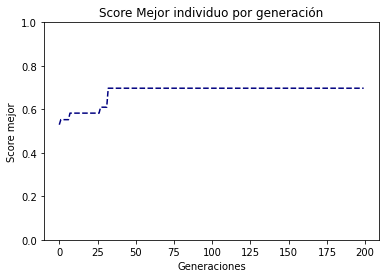

In [ ]:
plt.plot(clasificador132.scoresIndividuos, color='navy', linestyle='--')

plt.title('Score Mejor individuo por generación')
plt.xlabel('Generaciones') 
plt.ylim(0, 1)
plt.ylabel('Score mejor')
plt.show()

Se observa que, gracias al elitismo, el mejor individuo de la población para cada generación es mejor o igual al mejor individuo de la población para la generación anterior. Observamos que llega un punto en el que ya el algoritmo no mejora más, y que la mejora que hace tampoco es muy grande en comparación con otras mejoras que hemos ido viendo en otros algoritmos a lo largo de la asignatura.

##Fitness medio de la población por generación

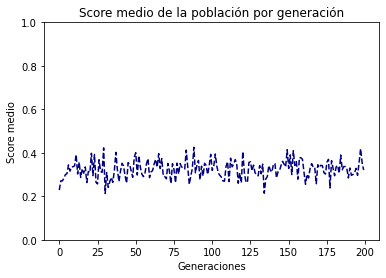

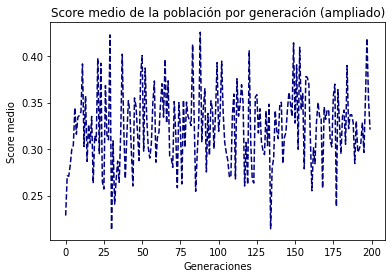

In [ ]:
plt.plot(clasificador132.scoresMedios, color='navy', linestyle='--')

plt.title('Score medio de la población por generación')
plt.xlabel('Generaciones') 
plt.ylim(0, 1)
plt.ylabel('Score medio')
plt.show()


plt.plot(clasificador132.scoresMedios, color='navy', linestyle='--')

plt.title('Score medio de la población por generación (ampliado)')
plt.xlabel('Generaciones') 
plt.ylabel('Score medio')
plt.show()

Se observa el fitness medio de la población que va variando respecto una generación a otra debido a las componentes aleatorias de cada ejecución.

# Análisis ROC

## Titanic

In [ ]:
#Naive Bayes

from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve  
from sklearn import metrics

df = pd.read_csv("titanic.data")
nombres_atrs = list(df.columns)
nombres_atrs.remove("Class")
X = df[nombres_atrs].values
y = df["Class"].values

# Utilizamos el propio sklearn para transformar los datos nominales a numéricos
enc = OneHotEncoder(sparse=False)
enc.fit(X)
X2 = enc.transform(X)
x_train1, x_test1, y_train1, y_test1 = train_test_split(X2, y, test_size=0.3)

clf_laplace = MultinomialNB() # Con Laplace
clf_laplace.fit(x_train1, y_train1)

errores = 1 - cross_val_score(clf_laplace, X2, y, cv=10)
pred = cross_val_predict(clf_laplace, X2, y, cv=10)

matrizConfusionNB = confusion_matrix(y, pred)

###Matrices de confusión

In [ ]:
from tabulate import tabulate

print()
print("\033[1mMatrices de confusión\033[0m")
print (tabulate([[matrizConfusion132, 
                   matrizConfusionNB]], 
                ["Reglas 13, Poblacion 50, Épocas 200", "Naive Bayes con Laplace"], 
                tablefmt="fancy_grid"))


Matrices de confusión
╒═══════════════════════════════════════╤═══════════════════════════╕
│ Reglas 13, Poblacion 50, Épocas 200   │ Naive Bayes con Laplace   │
╞═══════════════════════════════════════╪═══════════════════════════╡
│ [[157  41]                            │ [[515 104]                │
│  [ 35  80]]                           │  [128 299]]               │
╘═══════════════════════════════════════╧═══════════════════════════╛


En las tabla superiores podemos comparar las matrices de confusión resultantes de ejecutar el mejor clasificador para Titanic y el algoritmo de Naive Bayes con Laplace. Dentro de cada matriz la celda 11 indica TP (verdaderos positivos), la celda 12 indica FP (falsos positivos), la celda 21 indica FN (falsos negativos) y la celda 22 indica TN (verdaderos negativos). 
La diagonal principal indica los valores que se han predicho correctamente, y podemos observar que en nuestro mejor clasificador genético es bastante correcta (un 75% de aciertos, aproximadamente) comparandolo con la diagonal contraria, que serían las predicciones incorrectas (un 25% de fallos, aproximadamente).

###Espacio ROC

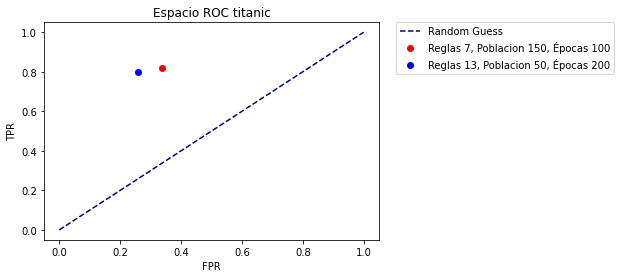

ACC Reglas 13, Poblacion 50, Épocas 200 = 0.7572
ACC Naive Bayes con Laplace = 0.7782


In [ ]:
import matplotlib.pyplot as plt

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.plot([(matrizConfusion132[0,1]/(matrizConfusion132[0,1]+matrizConfusion132[1,1]))], [(matrizConfusion132[0,0]/(matrizConfusion132[0,0]+matrizConfusion132[1,0]))], 'ro')
plt.plot([(matrizConfusionNB[0,1]/(matrizConfusionNB[0,1]+matrizConfusionNB[1,1]))], [(matrizConfusionNB[0,0]/(matrizConfusionNB[0,0]+matrizConfusionNB[1,0]))], 'bo') # NB con Laplace


plt.title('Espacio ROC titanic')
plt.xlabel('FPR') 
plt.ylabel('TPR')
plt.legend(['Random Guess','Reglas 7, Poblacion 150, Épocas 100','Reglas 13, Poblacion 50, Épocas 200', "Naive Bayes con Laplace"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

print("ACC Reglas 13, Poblacion 50, Épocas 200 = " + str("{0:.4f}".format((matrizConfusion132[0,0]+matrizConfusion132[1,1])/(matrizConfusion132[0,0]+matrizConfusion132[1,0]+matrizConfusion132[0,1]+matrizConfusion132[1,1]))))
print("ACC Naive Bayes con Laplace = " + str("{0:.4f}".format((matrizConfusionNB[0,0]+matrizConfusionNB[1,1])/(matrizConfusionNB[0,0]+matrizConfusionNB[1,0]+matrizConfusionNB[0,1]+matrizConfusionNB[1,1]))))

**Fe de erratas**: el punto rojo indica en la leyenda que es un clasificador genético de 7 reglas, 150 individuos y 100 épocas, pero en realidad está mostrando el resultado del clasificador genético de 13 reglas, 50 individuos y 200 épocas, mientras que el azul muestra Naive Bayes con Laplace. Perdón.

En el espacio ROC se muestran los puntos de los dos casos anteriores que tratamos en las matrices de confusión. Un método perfecto de predicción se situaría en un punto en la esquina superior izquierda del espacio ROC, representando que no hay ningún falso negativo y ningún falso positivo. La diagonal (Random Guess) divide el espacio ROC, los puntos por encima de la diagonal representan los buenos resultados de clasificación (mejor que el azar), y los puntos por debajo de la línea de los resultados pobres (peor que al azar).
ACC indica el porcentaje de aciertos, es decir, lo contrario de los errores que evaluamos anteriormente.

Ambos modelos comparados están por encima de la curva, y observamos que Naive Bayes es ligeramente mejor (del orden del 2%) que nuestro clasificador genético para Titanic.




###Curva ROC

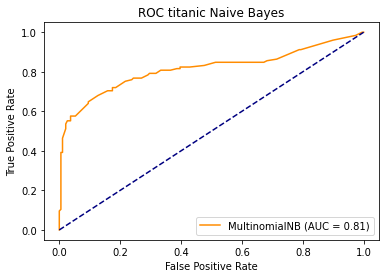

In [ ]:
import matplotlib.pyplot as plt

metrics.plot_roc_curve(clf_laplace, x_test1, y_test1, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title('ROC titanic Naive Bayes')
plt.legend(loc="lower right")
plt.show()

Según las curvas ROC, cuanto mayor área haya bajo la curva, mejor.  Esta área posee un valor comprendido entre 0,5 y 1, donde 1 representa un valor diagnóstico perfecto. Es decir, como el AUC es 0,81 significa que existe un 81% de probabilidad de que predicción realizada sea correcta.

## Tic-tac-toe

In [ ]:
#Naive Bayes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve  
from sklearn import metrics

df = pd.read_csv("tic-tac-toe.data")
nombres_atrs = list(df.columns)
nombres_atrs.remove("Class")
X = df[nombres_atrs].values
y = df["Class"].values

# Utilizamos el propio sklearn para transformar los datos nominales a numéricos
enc = OneHotEncoder(sparse=False)
enc.fit(X)
X2 = enc.transform(X)
x_train1, x_test1, y_train1, y_test1 = train_test_split(X2, y, test_size=0.3)

clf_laplace = MultinomialNB() # Con Laplace
clf_laplace.fit(x_train1, y_train1)

errores = 1 - cross_val_score(clf_laplace, X2, y, cv=10)
pred = cross_val_predict(clf_laplace, X2, y, cv=10)

matrizConfusionNB = confusion_matrix(y, pred)

###Matrices de confusión

In [ ]:
from tabulate import tabulate

print()
print("\033[1mMatrices de confusión\033[0m")
print (tabulate([[matrizConfusion131, 
                   matrizConfusionNB]], 
                ["Reglas 7, Poblacion 50, Épocas 100", "Naive Bayes con Laplace"], 
                tablefmt="fancy_grid"))


Matrices de confusión
╒══════════════════════════════════════╤═══════════════════════════╕
│ Reglas 7, Poblacion 50, Épocas 100   │ Naive Bayes con Laplace   │
╞══════════════════════════════════════╪═══════════════════════════╡
│ [[ 39  51]                           │ [[131 201]                │
│  [ 58 139]]                          │  [122 504]]               │
╘══════════════════════════════════════╧═══════════════════════════╛


La diagonal principal indica los valores que se han predicho correctamente, y podemos observar que para nuetro mejor clasificador genético es correcta (un 62% de aciertos, aproximadamente) comparandolo con la diagonal contraria, que serían las predicciones incorrectas (un 38% de fallos, aproximadamente). Vemos que el resultado es peor que para Titanic, como venimos observando ya con anterioridad.

###Espacio ROC

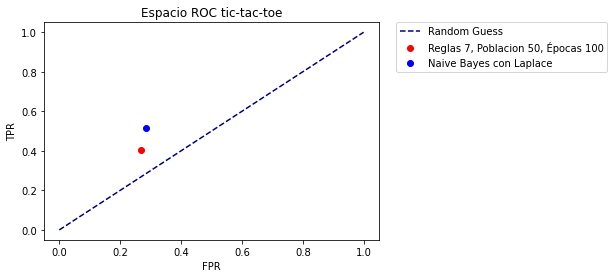

ACC Reglas 7, Poblacion 50, Épocas 100 = 0.6202
ACC Naive Bayes con Laplace = 0.6628


In [ ]:
import matplotlib.pyplot as plt

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.plot([(matrizConfusion131[0,1]/(matrizConfusion131[0,1]+matrizConfusion131[1,1]))], [(matrizConfusion131[0,0]/(matrizConfusion131[0,0]+matrizConfusion131[1,0]))], 'ro') # Nuestro sin Laplace
plt.plot([(matrizConfusionNB[0,1]/(matrizConfusionNB[0,1]+matrizConfusionNB[1,1]))], [(matrizConfusionNB[0,0]/(matrizConfusionNB[0,0]+matrizConfusionNB[1,0]))], 'bo') # NB con Laplace


plt.title('Espacio ROC tic-tac-toe')
plt.xlabel('FPR') 
plt.ylabel('TPR')
plt.legend(['Random Guess','Reglas 7, Poblacion 50, Épocas 100', "Naive Bayes con Laplace"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

print("ACC Reglas 7, Poblacion 50, Épocas 100 = " + str("{0:.4f}".format((matrizConfusion131[0,0]+matrizConfusion131[1,1])/(matrizConfusion131[0,0]+matrizConfusion131[1,0]+matrizConfusion131[0,1]+matrizConfusion131[1,1]))))
print("ACC Naive Bayes con Laplace = " + str("{0:.4f}".format((matrizConfusionNB[0,0]+matrizConfusionNB[1,1])/(matrizConfusionNB[0,0]+matrizConfusionNB[1,0]+matrizConfusionNB[0,1]+matrizConfusionNB[1,1]))))

Ambos modelos comparados están por encima de la curva, y observamos que Naive Bayes es mejor (del orden del 4%) que nuestro clasificador genético para Tic-tac-toe. Además, observamos que la *accuracy* ha caído un 13% aproximadamente respecto al otro conjunto de datos.

###Curva ROC

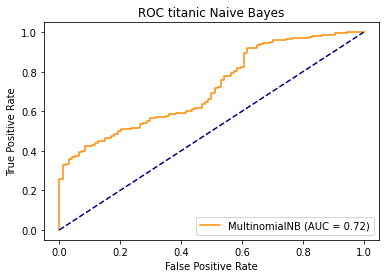

In [ ]:
import matplotlib.pyplot as plt

metrics.plot_roc_curve(clf_laplace, x_test1, y_test1, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title('ROC titanic Naive Bayes')
plt.legend(loc="lower right")
plt.show()

Según las curvas ROC, cuanto mayor área haya bajo la curva, mejor.  Esta área posee un valor comprendido entre 0,5 y 1, donde 1 representa un valor diagnóstico perfecto. Es decir, como el AUC es 0,72 significa que existe un 72% de probabilidad de que predicción realizada sea correcta. 

Podemos observar que Naive Bayes también predice peor para el conjunto tic-tac-toe, no solo nuestro clasificador genético, pues vemos que ha bajado de un 81% de accuracy a un 72%. No obstante, predice mejor Naive Bayes que nuestro clasificador genético para ambos caso y por eso entendemos que los algoritmos genéticos no se utilicen casi hoy en día, debido a su alto coste computacional y a sus peores resultados de clasificación comparados con otros algoritmos más eficientes en general.